In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
sns.set_style('darkgrid')
plt.rcParams ['font.size'] = 14
plt.rcParams ['figure.figsize'] = (9, 5)

In [ ]:
# read and load the dataset
data = pd.read_csv('//world_happiness_dataset_2024_dataset.csv')

In [ ]:
#first five Rows of the dataset
data.head(5)

,Country name,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298


In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

Country name                      0
Ladder score                      0
upperwhisker                      0
lowerwhisker                      0
  Log GDP per capita              3
  Social support                  3
  Healthy life expectancy         3
  Freedom to make life choices    3
  Generosity                      3
  Perceptions of corruption       3
Dystopia + residual               3
dtype: int64


In [ ]:
# Fill missing values with 0
data.fillna(0, inplace=True)

# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

Country name                      0
Ladder score                      0
upperwhisker                      0
lowerwhisker                      0
  Log GDP per capita              0
  Social support                  0
  Healthy life expectancy         0
  Freedom to make life choices    0
  Generosity                      0
  Perceptions of corruption       0
Dystopia + residual               0
dtype: int64


In [ ]:
# Check for duplicates
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


Number of duplicate rows: 0


In [ ]:


# Define the mapping for all 143 countries based on their regional indicators
country_to_region = {
    # Western Europe
    'Finland': 'Western Europe', 'Denmark': 'Western Europe', 'Iceland': 'Western Europe',
    'Sweden': 'Western Europe', 'Norway': 'Western Europe', 'Netherlands': 'Western Europe',
    'Switzerland': 'Western Europe', 'Luxembourg': 'Western Europe', 'Austria': 'Western Europe',
    'Ireland': 'Western Europe', 'Germany': 'Western Europe', 'Belgium': 'Western Europe',
    'France': 'Western Europe', 'United Kingdom': 'Western Europe', 'Greece': 'Western Europe',
    'Slovenia': 'Western Europe', 'Spain': 'Western Europe', 'Italy': 'Western Europe',
    'Portugal': 'Western Europe', 'Lithuania': 'Western Europe', 'Estonia': 'Western Europe',
    'Latvia': 'Western Europe',

    # Central and Eastern Europe
    'Czech Republic': 'Central and Eastern Europe', 'Slovakia': 'Central and Eastern Europe',
    'Poland': 'Central and Eastern Europe', 'Hungary': 'Central and Eastern Europe',
    'Romania': 'Central and Eastern Europe', 'Bulgaria': 'Central and Eastern Europe',
    'Czechia': 'Central and Eastern Europe', 'Croatia': 'Central and Eastern Europe',
    'Serbia': 'Central and Eastern Europe', 'Kosovo': 'Central and Eastern Europe',
    'Moldova': 'Central and Eastern Europe', 'Bosnia and Herzegovina': 'Central and Eastern Europe',
    'Montenegro': 'Central and Eastern Europe', 'North Macedonia': 'Central and Eastern Europe',
    'Albania': 'Central and Eastern Europe', 'Turkiye': 'Central and Eastern Europe',

    # North America and ANZ
    'Canada': 'North America and ANZ', 'United States': 'North America and ANZ',
    'Australia': 'North America and ANZ', 'New Zealand': 'North America and ANZ',

    # Middle East and North Africa
    'Israel': 'Middle East and North Africa', 'United Arab Emirates': 'Middle East and North Africa',
    'Saudi Arabia': 'Middle East and North Africa', 'Egypt': 'Middle East and North Africa',
    'Morocco': 'Middle East and North Africa', 'Jordan': 'Middle East and North Africa',
    'Kuwait': 'Middle East and North Africa', 'Bahrain': 'Middle East and North Africa',
    'Libya': 'Middle East and North Africa', 'Iran': 'Middle East and North Africa',
    'Algeria': 'Middle East and North Africa', 'Iraq': 'Middle East and North Africa',
    'Lebanon': 'Middle East and North Africa', 'State of Palestine': 'Middle East and North Africa',
    'Tunisia': 'Middle East and North Africa', 'Yemen': 'Middle East and North Africa',

    # Sub-Saharan Africa
    'South Africa': 'Sub-Saharan Africa', 'Nigeria': 'Sub-Saharan Africa',
    'Kenya': 'Sub-Saharan Africa', 'Ghana': 'Sub-Saharan Africa', 'Ethiopia': 'Sub-Saharan Africa',
    'Uganda': 'Sub-Saharan Africa', 'Congo (Brazzaville)': 'Sub-Saharan Africa',
    'Mozambique': 'Sub-Saharan Africa', 'Gabon': 'Sub-Saharan Africa',
    'Ivory Coast': 'Sub-Saharan Africa', 'Guinea': 'Sub-Saharan Africa',
    'Senegal': 'Sub-Saharan Africa', 'Namibia': 'Sub-Saharan Africa',
    'Niger': 'Sub-Saharan Africa', 'Burkina Faso': 'Sub-Saharan Africa',
    'Mauritania': 'Sub-Saharan Africa', 'Gambia': 'Sub-Saharan Africa',
    'Chad': 'Sub-Saharan Africa', 'Benin': 'Sub-Saharan Africa',
    'Liberia': 'Sub-Saharan Africa', 'Mali': 'Sub-Saharan Africa',
    'Madagascar': 'Sub-Saharan Africa', 'Togo': 'Sub-Saharan Africa',
    'Tanzania': 'Sub-Saharan Africa', 'Comoros': 'Sub-Saharan Africa',
    'Zambia': 'Sub-Saharan Africa', 'Eswatini': 'Sub-Saharan Africa',
    'Malawi': 'Sub-Saharan Africa', 'Botswana': 'Sub-Saharan Africa',
    'Zimbabwe': 'Sub-Saharan Africa', 'Congo (Kinshasa)': 'Sub-Saharan Africa',
    'Sierra Leone': 'Sub-Saharan Africa', 'Lesotho': 'Sub-Saharan Africa',
    'Cameroon': 'Sub-Saharan Africa',

    # Latin America and Caribbean
    'Mexico': 'Latin America and Caribbean', 'Brazil': 'Latin America and Caribbean',
    'Argentina': 'Latin America and Caribbean', 'Colombia': 'Latin America and Caribbean',
    'Chile': 'Latin America and Caribbean', 'Peru': 'Latin America and Caribbean',
    'Costa Rica': 'Latin America and Caribbean', 'Uruguay': 'Latin America and Caribbean',
    'El Salvador': 'Latin America and Caribbean', 'Panama': 'Latin America and Caribbean',
    'Guatemala': 'Latin America and Caribbean', 'Nicaragua': 'Latin America and Caribbean',
    'Paraguay': 'Latin America and Caribbean', 'Honduras': 'Latin America and Caribbean',
    'Dominican Republic': 'Latin America and Caribbean', 'Bolivia': 'Latin America and Caribbean',
    'Ecuador': 'Latin America and Caribbean', 'Venezuela': 'Latin America and Caribbean',
    'Jamaica': 'Latin America and Caribbean',

    # East Asia
    'China': 'East Asia', 'Japan': 'East Asia', 'South Korea': 'East Asia',
    'Taiwan Province of China': 'East Asia', 'Hong Kong S.A.R. of China': 'East Asia',
    'Mongolia': 'East Asia',

    # South Asia
    'India': 'South Asia', 'Pakistan': 'South Asia', 'Bangladesh': 'South Asia',
    'Sri Lanka': 'South Asia', 'Nepal': 'South Asia', 'Bhutan': 'South Asia',
    'Afghanistan': 'South Asia',

    # Southeast Asia
    'Indonesia': 'Southeast Asia', 'Thailand': 'Southeast Asia', 'Vietnam': 'Southeast Asia',
    'Philippines': 'Southeast Asia', 'Malaysia': 'Southeast Asia', 'Singapore': 'Southeast Asia',
    'Laos': 'Southeast Asia', 'Myanmar': 'Southeast Asia', 'Cambodia': 'Southeast Asia',

    # Central Asia
    'Uzbekistan': 'Central Asia', 'Kazakhstan': 'Central Asia',
    'Kyrgyzstan': 'Central Asia', 'Tajikistan': 'Central Asia',

    # Small States and Islands
    'Mauritius': 'Small States and Islands',
    'Malta': 'Small States and Islands', 'Cyprus': 'Small States and Islands',
    'Barbados': 'Small States and Islands', 'Fiji': 'Small States and Islands',

    # Russia and Neighbors
    'Russia': 'Russia and Neighbors', 'Armenia': 'Russia and Neighbors',
    'Georgia': 'Russia and Neighbors', 'Azerbaijan': 'Russia and Neighbors',
    'Ukraine': 'Russia and Neighbors',
}



In [ ]:
data_columns = ['Country name','regional_indicator', 'Ladder score', '  Log GDP per capita', '  Social support', '  Healthy life expectancy', '  Freedom to make life choices', '  Generosity', '  Perceptions of corruption'
]
data = data[data_columns].copy()
data.head()

,Country name,regional_indicator,Ladder score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.741,1.844,1.572,0.695,0.859,0.142,0.546
1,Denmark,Western Europe,7.583,1.908,1.520,0.699,0.823,0.204,0.548
2,Iceland,Western Europe,7.525,1.881,1.617,0.718,0.819,0.258,0.182
3,Sweden,Western Europe,7.344,1.878,1.501,0.724,0.838,0.221,0.524
4,Israel,Middle East and North Africa,7.341,1.803,1.513,0.740,0.641,0.153,0.193


In [ ]:
# Rename columns with the correct syntax
happy_df = data.rename({
    'Country name': 'country_name',
    'Ladder score': 'happiness_score',
    '  Log GDP per capita': 'log_GDP_per_capita',
    '  Social support': 'social_support',
    '  Healthy life expectancy': 'healthy_life_expectancy',
    '  Freedom to make life choices': 'freedom_to_make_life_choices',
    '  Generosity': 'generosity',
    '  Perceptions of corruption': 'perceptions_of_corruption'
}, axis=1)

# Display the first few rows of the renamed DataFrame
happy_df.head()

,country_name,regional_indicator,happiness_score,log_GDP_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.741,1.844,1.572,0.695,0.859,0.142,0.546
1,Denmark,Western Europe,7.583,1.908,1.520,0.699,0.823,0.204,0.548
2,Iceland,Western Europe,7.525,1.881,1.617,0.718,0.819,0.258,0.182
3,Sweden,Western Europe,7.344,1.878,1.501,0.724,0.838,0.221,0.524
4,Israel,Middle East and North Africa,7.341,1.803,1.513,0.740,0.641,0.153,0.193


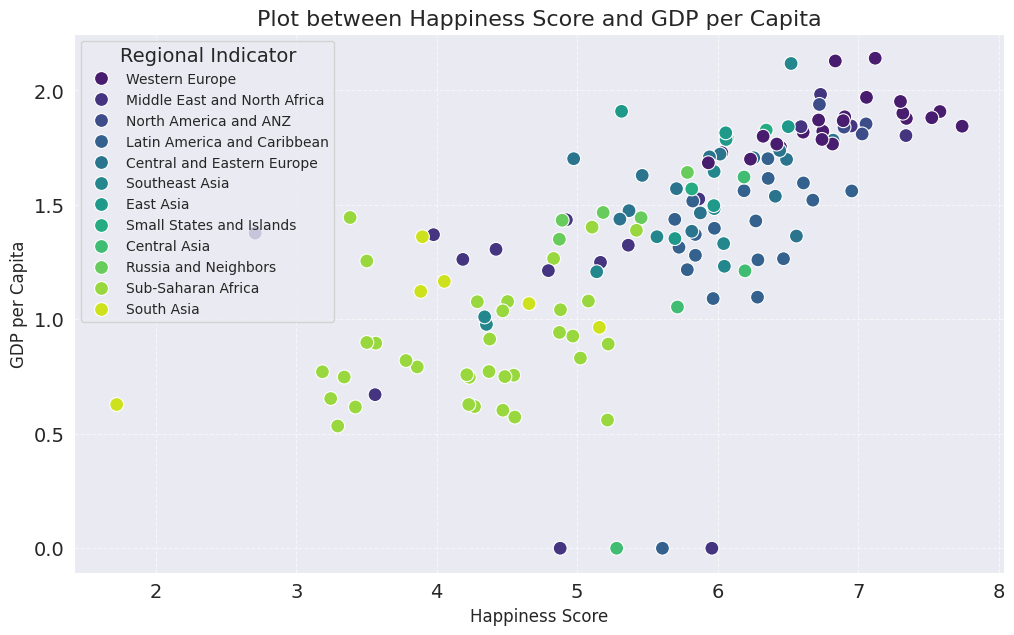

In [ ]:
# Plot between Happiness Score and GDP per capita
plt.rcParams['figure.figsize'] = (12, 7)
plt.title('Plot between Happiness Score and GDP per Capita', fontsize=16)

# Creating a scatter plot
sns.scatterplot(
    x=happy_df['happiness_score'],
    y=happy_df['log_GDP_per_capita'],
    hue=happy_df['regional_indicator'],
    palette='viridis',
    s=100
)

# Adding legend, labels, and customizations
plt.legend(loc='upper left', fontsize=10, title='Regional Indicator')
plt.xlabel('Happiness Score', fontsize=12)
plt.ylabel('GDP per Capita', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [ ]:
gdp_region = happy_df.groupby('regional_indicator')['log_GDP_per_capita'].sum()
gdp_region

,log_GDP_per_capita
regional_indicator,
Central Asia,3.888
Central and Eastern Europe,23.925
East Asia,10.202
Latin America and Caribbean,25.236
Middle East and North Africa,20.206
North America and ANZ,7.443
Russia and Neighbors,7.336
Small States and Islands,5.191
South Asia,6.311


Text(0, 0.5, '')

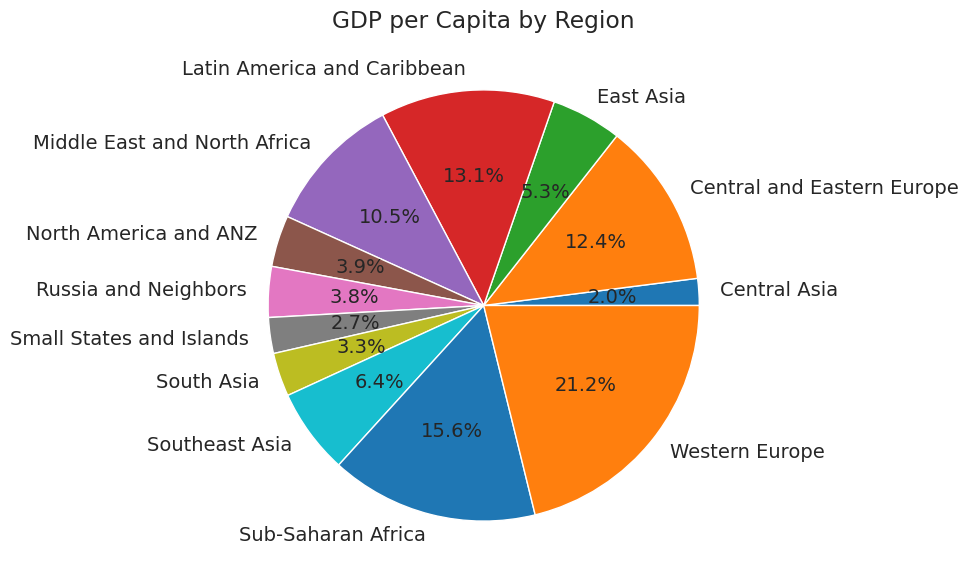

In [ ]:
gdp_region.plot.pie(autopct = '%1.1f%%')
plt.title('GDP per Capita by Region')
plt.ylabel('')

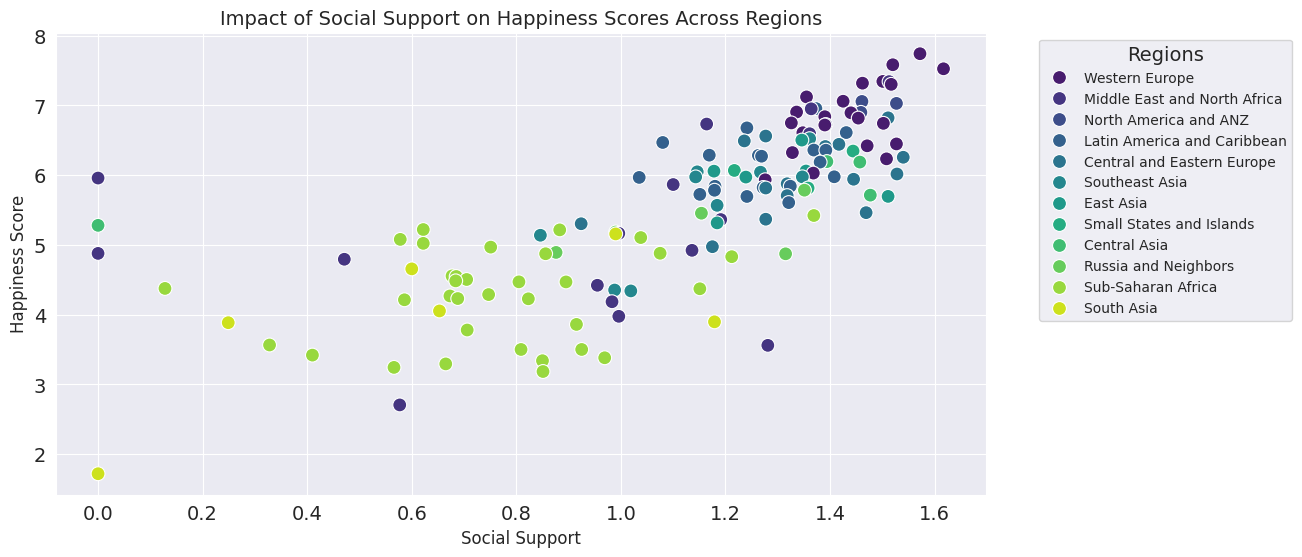

In [ ]:
# Scatter plot to analyze the impact of social support on happiness scores across regions
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x='social_support',
    y='happiness_score',
    hue='regional_indicator',
    data=happy_df,
    palette='viridis',
    s=100
)
# Add titles and labels
plt.title("Impact of Social Support on Happiness Scores Across Regions", fontsize=14)
plt.xlabel("Social Support", fontsize=12)
plt.ylabel("Happiness Score", fontsize=12)
plt.legend(title="Regions", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True)
plt.show()


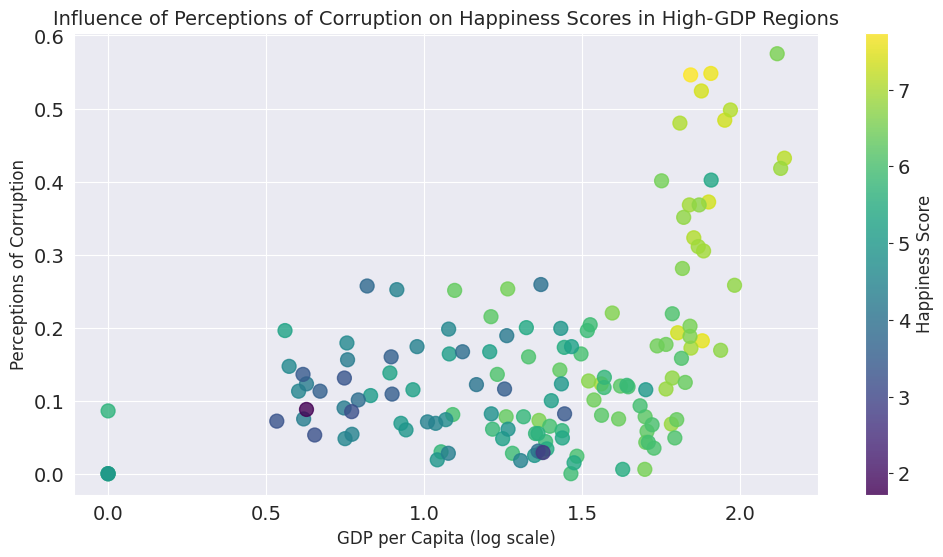

In [ ]:
# Scatter plot to analyze how perceptions of corruptions influence happiness scores in  high capita regions.
plt.figure(figsize=(12, 6))
scatter = plt.scatter(
    x=happy_df['log_GDP_per_capita'],
    y=happy_df['perceptions_of_corruption'],
    c=happy_df['happiness_score'],
    cmap='viridis',
    s=100,
    alpha=0.8
)

# Add color bar for happiness scores
cbar = plt.colorbar(scatter)
cbar.set_label('Happiness Score', fontsize=12)

# Add titles and labels
plt.title("Influence of Perceptions of Corruption on Happiness Scores in High-GDP Regions", fontsize=14)
plt.xlabel("GDP per Capita (log scale)", fontsize=12)
plt.ylabel("Perceptions of Corruption", fontsize=12)
plt.grid(True)
plt.show()


<ipython-input-33-d9ed3025a0de>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country_name', y='happiness_score', data=top_10_countries, palette='viridis')


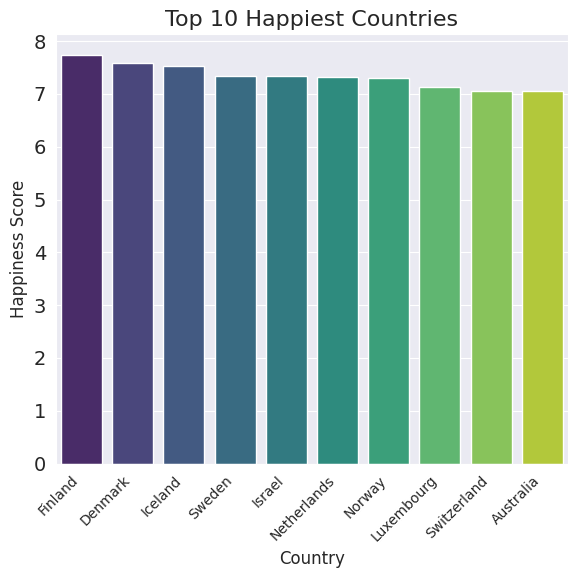

In [ ]:

#Sort the DataFrame by happiness_score in descending order and select the top 10
top_10_countries = happy_df.sort_values(by=['happiness_score'], ascending=False).head(10)

# Create a bar chart visualization
plt.figure(figsize=(6, 6))  # Adjust figure size if needed
sns.barplot(x='country_name', y='happiness_score', data=top_10_countries, palette='viridis')

# Customize the chart
plt.title('Top 10 Happiest Countries', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping

# Display the chart
plt.show()

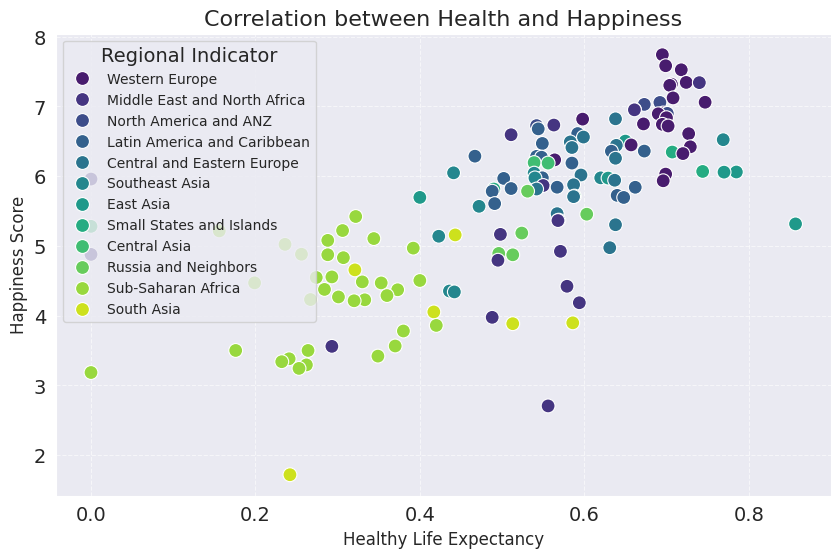

In [ ]:

# Assuming your data is loaded into the 'happy_df' DataFrame

# Create the scatter plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.scatterplot(x='healthy_life_expectancy', y='happiness_score', data=happy_df, hue='regional_indicator', palette='viridis', s=100)

# Add title and labels
plt.title('Correlation between Health and Happiness', fontsize=16)
plt.xlabel('Healthy Life Expectancy', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)

# Customize the plot
plt.legend(title='Regional Indicator', loc='upper left', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)

# Display the plot
plt.show()

Text(0, 0.5, '')

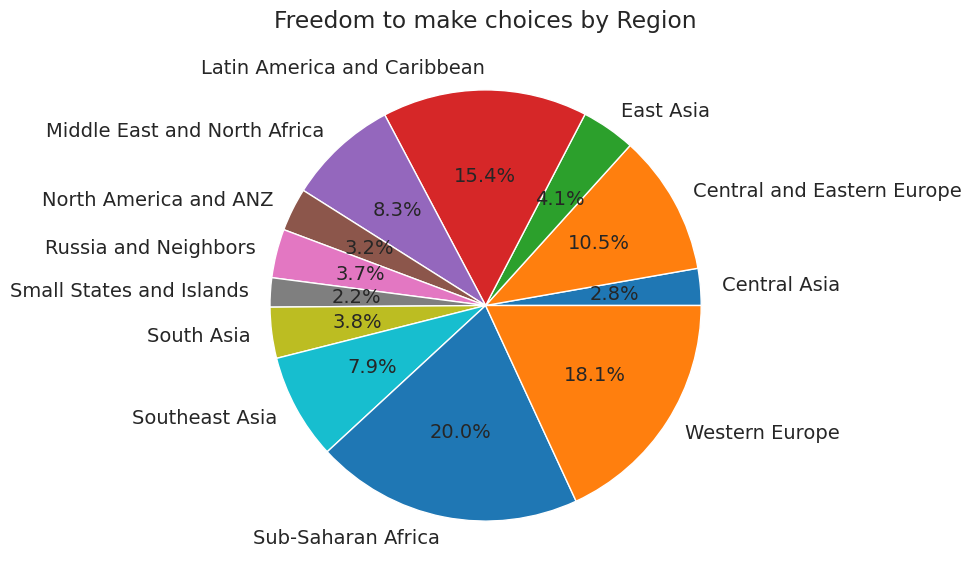

In [ ]:
gdp_region = happy_df.groupby('regional_indicator')['freedom_to_make_life_choices'].sum()
gdp_region
gdp_region.plot.pie(autopct = '%1.1f%%')
plt.title('Freedom to make choices by Region')
plt.ylabel('')


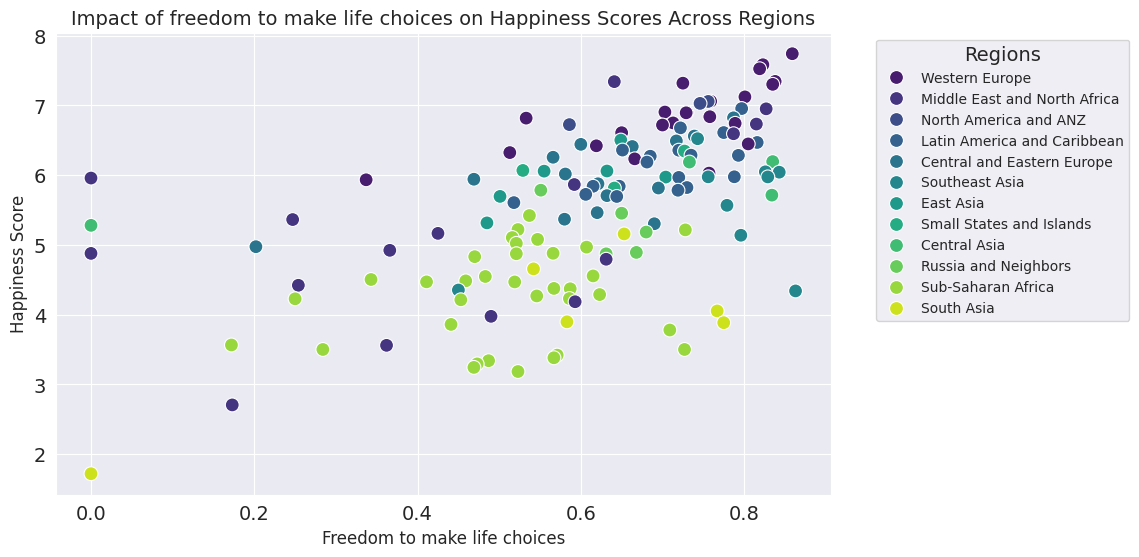

In [ ]:
# Scatter plot to analyze how Freedom to make life choices influence happiness scores in  high capita regions.

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='freedom_to_make_life_choices',
    y='happiness_score',
    hue='regional_indicator',
    data=happy_df,
    palette='viridis',
    s=100
)
# Add titles and labels
plt.title("Impact of freedom to make life choices on Happiness Scores Across Regions", fontsize=14)
plt.xlabel("Freedom to make life choices", fontsize=12)
plt.ylabel("Happiness Score", fontsize=12)
plt.legend(title="Regions", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True)
plt.show()

<ipython-input-52-3038678a28ba>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country_name', y='generosity', data=top_10_countries, palette='viridis')


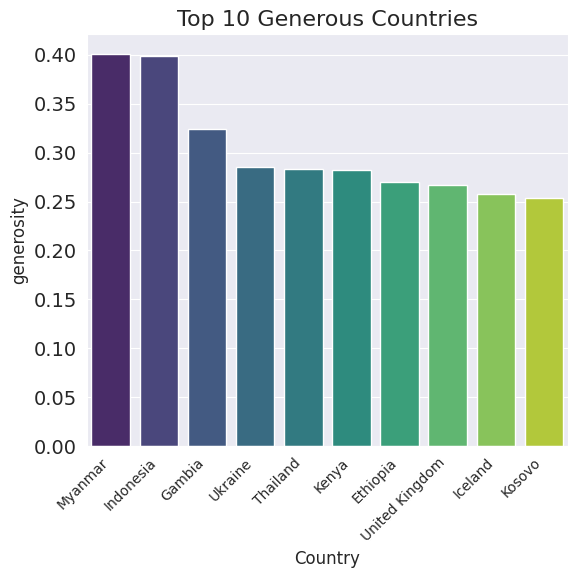

<ipython-input-52-3038678a28ba>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country_name', y='generosity', data=bottom_10_countries, palette='viridis')


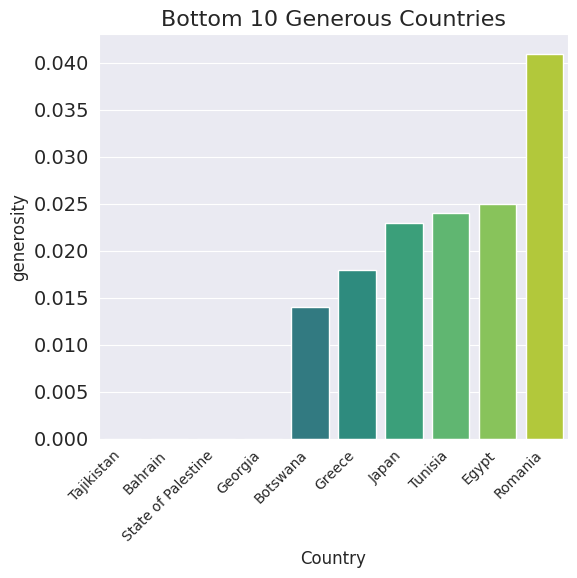

In [ ]:
#Sort the DataFrame by Genorosity_score in descending order and select the top 10
top_10_countries = happy_df.sort_values(by=['generosity'], ascending=False).head(10)

# Create a bar chart visualization
plt.figure(figsize=(6, 6))  # Adjust figure size if needed
sns.barplot(x='country_name', y='generosity', data=top_10_countries, palette='viridis')

# Customize the chart
plt.title('Top 10 Generous Countries', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('generosity', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping

# Display the chart
plt.show()#

#Sort the DataFrame by generosity_score in ascending order and select the bottom 10
bottom_10_countries = happy_df.sort_values(by=['generosity'], ascending =True).head(10)

# Create a bar chart visualization
plt.figure(figsize=(6, 6))  # Adjust figure size if needed
sns.barplot(x='country_name', y='generosity', data=bottom_10_countries, palette='viridis')

# Customize the chart
plt.title('Bottom 10 Generous Countries', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('generosity', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping

# Display the chart
plt.show()#

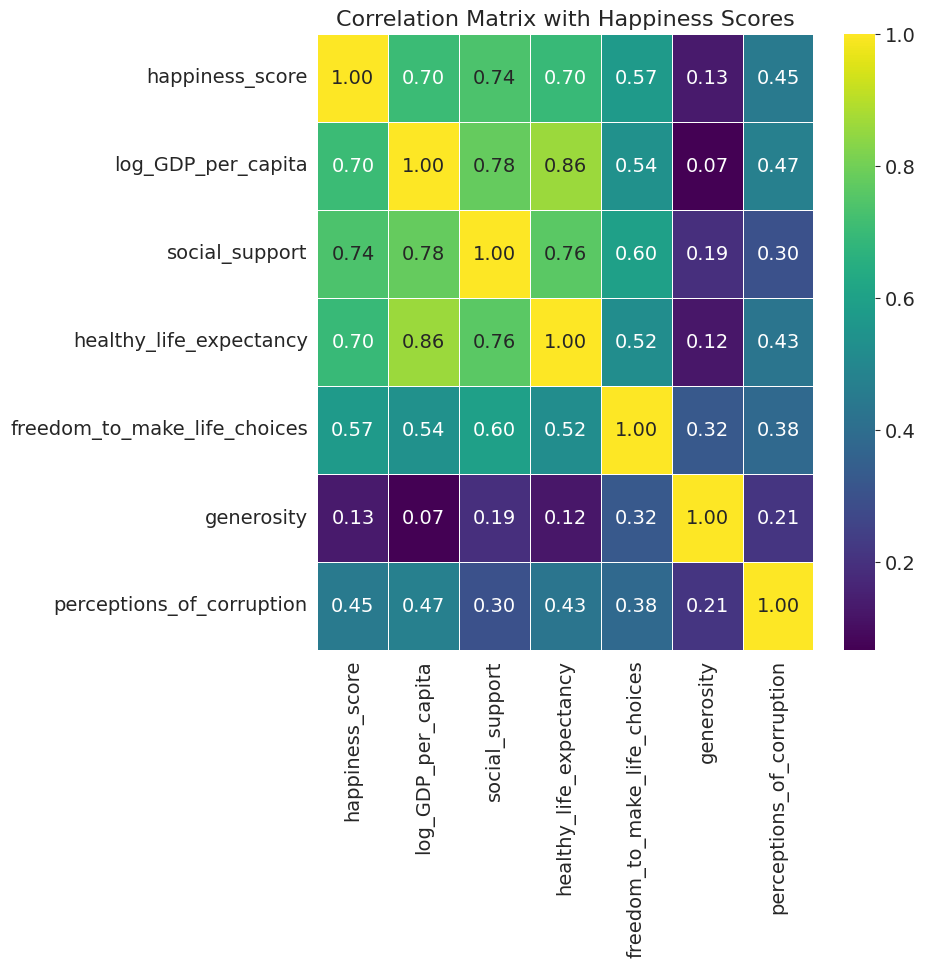

In [ ]:
# Assuming your DataFrame is named 'happy_df'
plt.figure(figsize=(8, 8))  # Adjust figure size as needed

# Calculate the correlation matrix, excluding non-numeric columns
correlation_matrix = happy_df.select_dtypes(include=np.number).corr()

# Create the heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,  # Display correlation values on the heatmap
    cmap='viridis',  # Choose a colormap (e.g., 'viridis', 'coolwarm', 'plasma')
    fmt=".2f",  # Format correlation values to two decimal places
    linewidths=0.5,  # Add lines between cells
)

# Add title
plt.title("Correlation Matrix with Happiness Scores", fontsize=16)

# Display the plot
plt.show()